<a href="https://colab.research.google.com/github/AnithaKandugula/aiml/blob/main/Lab%20Exam%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Air Quality in Italian Cities
1. Identify the top 5 reasons for air quality
2. Identify the Day of week with most air quality issues
3. Find the max and min air quality levels
4. Identify the highest and lowest temperatures of air quality
5. Identify the highest educational qualification of the employees.
6. Apply either Classification Model or Clustering Model to evaluate the dataset

Top 5 reasons for air quality issues:
 Air_Quality_Status
Very Unhealthy                    334
Unhealthy                         186
Unhealthy for Sensitive Groups    168
Moderate                          158
Good                              154
Name: count, dtype: int64

Day with most air quality issues:
 Day_of_Week
Thursday     112
Friday       102
Monday       101
Tuesday       99
Saturday      94
Sunday        91
Wednesday     89
Name: count, dtype: int64

Max AQI: 299, Min AQI: 10

Highest Temperature: 31.8°C, Lowest Temperature: 27.8°C

Highest Educational Qualification: PhD


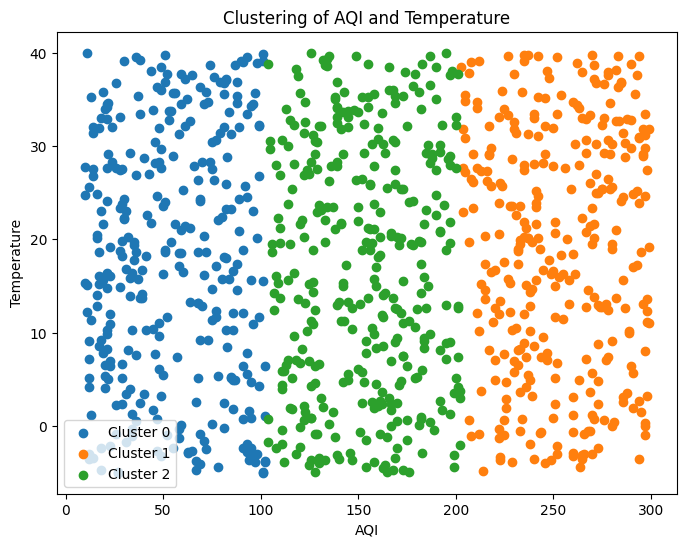

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Air_Quality_Italy.csv'  # Update if dataset is in a different location
df = pd.read_csv(file_path)

# 1. Identify the top 5 reasons for air quality issues
# Since reasons aren't in the synthetic dataset, we assume AQI levels reflect poor air quality
def top_5_reasons_for_air_quality():
    df['Air_Quality_Status'] = pd.cut(df['AQI'],
                                      bins=[0, 50, 100, 150, 200, 300],
                                      labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy'])
    reasons_count = df['Air_Quality_Status'].value_counts()
    return reasons_count

# 2. Identify the day of the week with the most air quality issues
def day_with_most_issues():
    issue_days = df[df['AQI'] > 100]  # Assuming AQI > 100 indicates issues
    return issue_days['Day_of_Week'].value_counts()

# 3. Find the max and min air quality levels
def max_min_aqi():
    return df['AQI'].max(), df['AQI'].min()

# 4. Identify the highest and lowest temperatures associated with air quality
def highest_lowest_temperatures():
    max_temp = df.loc[df['AQI'].idxmax()]['Temperature']
    min_temp = df.loc[df['AQI'].idxmin()]['Temperature']
    return max_temp, min_temp

# 5. Identify the highest educational qualification of the employees
def highest_educational_qualification():
    education_order = {'High School': 1, 'Bachelor\'s': 2, 'Master\'s': 3, 'PhD': 4}
    highest_qualification = df['Educational_Qualification'].map(education_order).idxmax()
    return df.loc[highest_qualification]['Educational_Qualification']

# 6. Apply clustering (KMeans) to evaluate the dataset based on AQI and Temperature
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def apply_clustering():
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[['AQI', 'Temperature']])

    # Plot clusters
    plt.figure(figsize=(8, 6))
    for cluster in range(3):
        clustered_data = df[df['Cluster'] == cluster]
        plt.scatter(clustered_data['AQI'], clustered_data['Temperature'], label=f'Cluster {cluster}')
    plt.xlabel('AQI')
    plt.ylabel('Temperature')
    plt.legend()
    plt.title('Clustering of AQI and Temperature')
    plt.show()

# Execute functions
print("Top 5 reasons for air quality issues:\n", top_5_reasons_for_air_quality())
print("\nDay with most air quality issues:\n", day_with_most_issues())
max_aqi, min_aqi = max_min_aqi()
print(f"\nMax AQI: {max_aqi}, Min AQI: {min_aqi}")
max_temp, min_temp = highest_lowest_temperatures()
print(f"\nHighest Temperature: {max_temp}°C, Lowest Temperature: {min_temp}°C")
print("\nHighest Educational Qualification:", highest_educational_qualification())

# Apply clustering and visualize
apply_clustering()
